In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent,
)
import os
from dotenv import load_dotenv

In [3]:
import sys
sys.path.append("D:\Project\DA for everyone\data-science-project") # vì llm không thể kết nối qua được nên dùng đường dẫn vô
from src.models.llm import load_llm

In [4]:
%pip install -q -U google-generativeai langchain-google-genai

Note: you may need to restart the kernel to use updated packages.


In [5]:
import google.generativeai as genai

C:\Users\Khang\AppData\Local\Temp\ipykernel_9744\613638648.py:1: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


In [6]:
load_dotenv()
genai.configure(api_key=os.getenv("GOOGLE_API_KEY"))

print("Danh sách model bạn có thể dùng:")
for m in genai.list_models():
    if 'generateContent' in m.supported_generation_methods:
        print(f"- {m.name}")

Danh sách model bạn có thể dùng:
- models/gemini-2.5-flash
- models/gemini-2.5-pro
- models/gemini-2.0-flash-exp
- models/gemini-2.0-flash
- models/gemini-2.0-flash-001
- models/gemini-2.0-flash-exp-image-generation
- models/gemini-2.0-flash-lite-001
- models/gemini-2.0-flash-lite
- models/gemini-2.0-flash-lite-preview-02-05
- models/gemini-2.0-flash-lite-preview
- models/gemini-exp-1206
- models/gemini-2.5-flash-preview-tts
- models/gemini-2.5-pro-preview-tts
- models/gemma-3-1b-it
- models/gemma-3-4b-it
- models/gemma-3-12b-it
- models/gemma-3-27b-it
- models/gemma-3n-e4b-it
- models/gemma-3n-e2b-it
- models/gemini-flash-latest
- models/gemini-flash-lite-latest
- models/gemini-pro-latest
- models/gemini-2.5-flash-lite
- models/gemini-2.5-flash-image-preview
- models/gemini-2.5-flash-image
- models/gemini-2.5-flash-preview-09-2025
- models/gemini-2.5-flash-lite-preview-09-2025
- models/gemini-3-pro-preview
- models/gemini-3-flash-preview
- models/gemini-3-pro-image-preview
- models/na

In [7]:
load_dotenv()
api_key = os.getenv("GOOGLE_API_KEY")
MODEL_NAME ="gemini-2.0-flash"
llm = load_llm(MODEL_NAME ,api_key)

2025-12-26 10:48:36.109 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 10:48:36.290 
  command:

    streamlit run d:\Project\DA for everyone\data-science-project\venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-26 10:48:36.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 10:48:36.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 10:48:36.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 10:48:36.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 10:48:36.768 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-26 10:48:36

In [8]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
import pandas as pd

df = pd.DataFrame({"x":[1,2,3], "y":[4,5,6]})
da_agent= create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    agent_type='tool-calling',  #   gọi tool nội bộ để xử lý DataFrame
    allow_dangerous_code=True,  # chạy những đoạn code nguy hiểm
    verbose=True,   #in ra log chi tiết quá trình suy nghĩ và thực thi.
    return_intermediate_steps=True  # trả về các bước trung gian
)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nplt.scatter(df['x'], df['y'])\nplt.savefig('scatter_plot.png')\nprint('Đã lưu file scatter_plot.png')"}`


Đã lưu file scatter_plot.png
Đã lưu file scatter_plot.png.

> Finished chain.


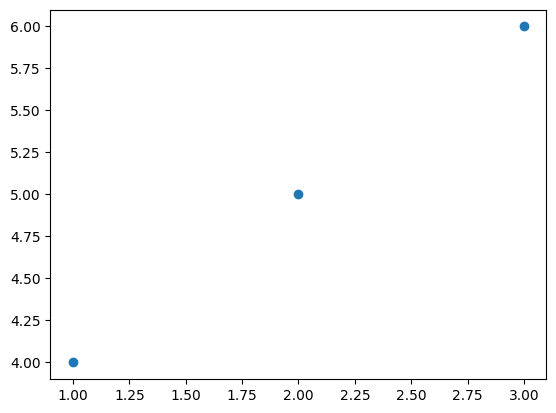

In [9]:
query = """
Bạn có quyền truy cập vào công cụ python_repl_ast. 
Hãy thực hiện các bước sau:
1. import matplotlib.pyplot as plt
2. Vẽ biểu đồ scatter từ dataframe `df` với trục x là cột 'x' và trục y là cột 'y'.
3. plt.savefig('scatter_plot.png')
4. Trả về câu xác nhận đã lưu file.
"""
response = da_agent.invoke(query)

In [10]:
response

{'input': "\nBạn có quyền truy cập vào công cụ python_repl_ast. \nHãy thực hiện các bước sau:\n1. import matplotlib.pyplot as plt\n2. Vẽ biểu đồ scatter từ dataframe `df` với trục x là cột 'x' và trục y là cột 'y'.\n3. plt.savefig('scatter_plot.png')\n4. Trả về câu xác nhận đã lưu file.\n",
 'output': 'Đã lưu file scatter_plot.png.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\nplt.scatter(df['x'], df['y'])\nplt.savefig('scatter_plot.png')\nprint('Đã lưu file scatter_plot.png')"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\nplt.scatter(df[\'x\'], df[\'y\'])\\nplt.savefig(\'scatter_plot.png\')\\nprint(\'Đã lưu file scatter_plot.png\')"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'function_call': {'name': 'python_repl_ast', 'arguments': '{"query": "import matplotlib.pyplot as plt\\nplt.scatter(df[\'x\'], df[\'y\'])\\nplt.savefig(\'scatter_plot.pn

| **Khóa (Key)**       | **Nội dung**                                                       |
| -------------------- | ------------------------------------------------------------------ |
| `input`              | Câu hỏi ban đầu của bạn                                            |
| `output`             | Câu trả lời cuối cùng của Agent sau khi chạy xong toàn bộ pipeline |
| `intermediate_steps` | Danh sách các **Tuple**                                            |
|                      | Mỗi Tuple có dạng: **(AgentAction, ToolOutput)**                   |
|                      | • **AgentAction**: Agent quyết định dùng tool gì, với input nào    |
|                      | • **ToolOutput**: Kết quả trả về từ tool đó                        |


In [11]:
last_step = response['intermediate_steps'][-1]
last_step

(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\nplt.scatter(df['x'], df['y'])\nplt.savefig('scatter_plot.png')\nprint('Đã lưu file scatter_plot.png')"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\nplt.scatter(df[\'x\'], df[\'y\'])\\nplt.savefig(\'scatter_plot.png\')\\nprint(\'Đã lưu file scatter_plot.png\')"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'function_call': {'name': 'python_repl_ast', 'arguments': '{"query": "import matplotlib.pyplot as plt\\nplt.scatter(df[\'x\'], df[\'y\'])\\nplt.savefig(\'scatter_plot.png\')\\nprint(\'\\u0110\\u00e3 l\\u01b0u file scatter_plot.png\')"}'}}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b58c5-cd3a-7ac2-baa6-ef2ae5f55455', tool_calls=[{'name': 'python_repl_ast', 'args': {'query': "import matplotlib.pyplot as plt\nplt.scatter

In [12]:
final_code = last_step[0].tool_input['query']
final_code

"import matplotlib.pyplot as plt\nplt.scatter(df['x'], df['y'])\nplt.savefig('scatter_plot.png')\nprint('Đã lưu file scatter_plot.png')"

In [13]:
answer = llm.invoke('bạn là một chatbot hãy nói cho tôi về coonng dụng của bạn')

In [14]:
answer

AIMessage(content='Chào bạn, tôi là một chatbot AI được thiết kế để hỗ trợ bạn trong nhiều công việc khác nhau. Dưới đây là một số công dụng chính của tôi:\n\n**1. Cung cấp thông tin:**\n\n*   **Trả lời câu hỏi:** Tôi có thể trả lời câu hỏi của bạn về nhiều chủ đề khác nhau, từ khoa học, lịch sử, văn hóa, đến tin tức, giải trí, và nhiều lĩnh vực khác.\n*   **Tìm kiếm thông tin:** Tôi có thể giúp bạn tìm kiếm thông tin trên internet một cách nhanh chóng và hiệu quả.\n*   **Tóm tắt thông tin:** Tôi có thể tóm tắt các bài viết dài, báo cáo, hoặc tài liệu thành những đoạn ngắn gọn và dễ hiểu.\n\n**2. Hỗ trợ công việc và học tập:**\n\n*   **Soạn thảo văn bản:** Tôi có thể giúp bạn viết email, báo cáo, bài luận, hoặc các loại văn bản khác.\n*   **Dịch thuật:** Tôi có thể dịch văn bản từ ngôn ngữ này sang ngôn ngữ khác.\n*   **Lên ý tưởng:** Tôi có thể giúp bạn brainstorming và đưa ra các ý tưởng sáng tạo cho các dự án.\n*   **Học tập:** Tôi có thể giúp bạn học một ngôn ngữ mới, ôn tập kiến t

In [15]:
from src.agents.planner import classify_intent

In [16]:
llm = load_llm(MODEL_NAME, api_key)
print(classify_intent(llm, "phân tích câu các cột của dữ liệu"))

EXECUTOR
